# Fake news intentions

In [137]:
#Importing libraries and packages 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly 
import plotly.express as px
import seaborn as sns
from math import pi

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [138]:
df = pd.read_csv('C:/Users/melis/OneDrive/Desktop/News/news_articles.csv')
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [139]:
df = df.drop_duplicates() #Duplicate values

In [140]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2091    False
2092    False
2093    False
2094    False
2095    False
Length: 2086, dtype: bool

In [141]:
df.duplicated(subset=['text_without_stopwords'])

0       False
1       False
2       False
3       False
4       False
        ...  
2091     True
2092     True
2093     True
2094     True
2095     True
Length: 2086, dtype: bool

In [142]:
df=df.drop_duplicates(subset='text_without_stopwords')
df

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2042,Jane Chastain,2016-10-27T03:04:50.704+03:00,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,english,wnd.com,No Image URL,bias,Real,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,1.0
2043,Michael Brown,2016-10-27T03:04:54.788+03:00,reasons ill vote for trump,school named for munichmassacre mastermind ter...,english,wnd.com,http://mobile.wnd.com/files/2011/12/leftfield3...,bias,Real,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...,1.0
2044,Ann Coulter,2016-10-27T03:05:01.989+03:00,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,english,wnd.com,http://www.wnd.com/files/2016/10/danney-willll...,bias,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...,1.0
2045,Larry Elder,2016-10-27T03:05:05.815+03:00,trump vs clinton a risk vs a disaster,check out hillarythemed haunted house anticlin...,english,wnd.com,http://www.wnd.com/files/2015/10/Hillary-Clint...,bias,Real,fascinated sex,billion even known keeping supposedly deleted ...,0.0


#### Insight 
- __All the duplicate values have been removed__

In [143]:
df.isnull().sum() #NUll values

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    1
text_without_stopwords     1
hasImage                   0
dtype: int64

In [144]:
df = df.dropna()
df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

#### Insight 
- __All the null values have been removed__

In [145]:
#Shape of row and columns

print("Number of rows present in the dataset are: ", df.shape[0])  
print("Number of columns present in the dataset are: ", df.shape[1])

Number of rows present in the dataset are:  1936
Number of columns present in the dataset are:  12


In [146]:
#Unique types

df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

## These are the 8 different types of articles:

1. __bs (i.e. false content)__

2. __junksci(i.e. junk science)__

3. __hate__

4. __fake__

5. __conspiracy__

6. __bias__

7. __satire__

8. __state__

## Explanation 

[Satire] : Sources that provide humorous commentary on current events in the form of fake news.

Extreme [Bias] : Sources that traffic in political propaganda and gross distortions of fact.

[Conspiracy] Theory : Sources that are well-known promoters of kooky conspiracy theories.

[Junk Science] : Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims. 

[Hate] Group : Sources that actively promote racism, misogyny, homophobia and other forms of discrimination

[State] News : Sources in repressive states operating under government
sanction.


# Unigrams and Bigrams

- Bokeh is a Python library for creating interactive visualizations for modern web browsers. It helps you build beautiful graphics, ranging from simple plots to complex dashboards with streaming datasets.

In [147]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import curdoc

In [148]:
output_notebook()

Loading BokehJS ...

In [149]:
def get_top_n_words(corpus, n = None):
    """
    A function that returns the top 'n' unigrams used in the corpus
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus) ## Shape: (2045, 46774) -> There are 2045 sentences and 46774 words
    sum_words = bag_of_words.sum(axis=0) ## Shape: (1, 46774) -> Count of occurance of each word
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] ## vec.vocabulary_.items returns the dictionary with (word, index)
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return freq_sorted[:n]

def get_top_n_bigram(corpus, n = None):
    """
    A function that returns the top 'n' bigrams used in the corpus
    """
    vec = CountVectorizer(ngram_range = (2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freq_sorted = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return freq_sorted[:n]

In [150]:
top_unigram = get_top_n_words(df['text_without_stopwords'], 20)
words = [i[0] for i in top_unigram]
count = [i[1] for i in top_unigram]
source = ColumnDataSource(data = dict(Word = words, counts = count, color = ['#C20078'] * 20))

p = figure(x_range = words, plot_height = 400, plot_width = 800, title = "Top Unigrams", tools = "hover", tooltips = "@Word: @counts")
p.vbar(x = 'Word', top = 'counts', width = 0.8, source = source, color = 'color')
curdoc().theme = 'dark_minimal'
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.title.align = 'center'
p.xaxis.major_label_orientation = "vertical"
show(p)

In [151]:
top_bigram = get_top_n_bigram(df['text_without_stopwords'], 20)
words = [i[0] for i in top_bigram]
count = [i[1] for i in top_bigram]
source = ColumnDataSource(data = dict(Word = words, counts = count, color = ['#4B0082'] * 20))

p1 = figure(x_range = words, plot_height = 400, plot_width = 800, title = "Top Bigrams", tools = "hover", tooltips = "@Word: @counts")
p1.vbar(x = 'Word', top = 'counts', width = 0.8, source = source, color = 'color')
# curdoc().theme = 'dark_minimal'
p1.xgrid.grid_line_color = None
p1.title.align = 'center'
p1.y_range.start = 0
p1.xaxis.major_label_orientation = "vertical"
show(p1)

### Insight 
- __From the above unigrams and bigrams, the top words are "Hillary Clinton", "Donald Trump", "United States" and "election day" etc which suggests that this dataset was taken around the election days.__

## Word Cloud of Texts

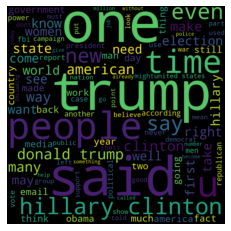

In [152]:
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


### Insight 
- __Technique used for representing text data in which the size of each word indicates its frequency or importance. Above wordcloud represents "trump", "said","one","hillary clinton" so on words are used more in articles.__

# Types of Articles

In [153]:
different_types = df['type'].value_counts().keys().to_list()
count = df['type'].value_counts().values
count1 = count / sum(count) * 100
angle = count / sum(count) * 2 * pi

source = ColumnDataSource(data = dict(types = different_types, count = count, color = ['salmon', 'purple', 'turquoise', 'olive', 'red', 'orange', 'teal', 'pink'], angle = angle, percentage = count1))

p3 = figure(plot_height = 400, plot_width = 400, title="Proportion of Article Types",
           tools = "hover", tooltips = "@types: @percentage", x_range=(-1.0, 1.0))  ## Pie chart for different types

p3.wedge(x = 0, y = 1, radius = 0.8,
        start_angle = cumsum('angle', include_zero=True), end_angle = cumsum('angle'),
        line_color = "white", fill_color = 'color', legend_field = 'types', source = source)
p3.title.align = 'center'
p3.legend.location = "top_right"

p3.legend.label_text_font_size = '5pt'

show(p3)

## Bigrams for different types 

In [154]:
def top_bigrams_type(type_name, color_hex):
    """
    A function that plots the bar graph representing the top unigrams for 'type_name'
    """
    df_type = df[df['type'] == type_name]
    top = get_top_n_bigram(df_type['text_without_stopwords'], 20)
    words = [i[0] for i in top]
    count = [i[1] for i in top]
    source = ColumnDataSource(data = dict(Word = words, counts = count, color = [color_hex] * 20))

    p = figure(x_range = words, plot_height = 400, plot_width = 800, title = "Top Bigrams for " + type_name, tools = "hover", tooltips = "@Word: @counts")
    p.vbar(x = 'Word', top = 'counts', width = 0.8, source = source, color = 'color')
    curdoc().theme = 'dark_minimal'
    p.xgrid.grid_line_color = None
    p.title.align = 'center'
    p.y_range.start = 0
    p.xaxis.major_label_orientation = "vertical"
    show(p)

In [155]:
top_bigrams_type('bias', '#40E0D0')

In [156]:
top_bigrams_type('fake', '#FFC0CB')

In [157]:
top_bigrams_type('state', '#FFA500')

In [158]:
top_bigrams_type('hate', '#808000')

### Insight :
- __For the type ' hate ' the top bigrams are justified beacuse the data is from time during the elections, many would spread hate against the leader whom they don't support. Some might be the supporters of Hillary Clinton, and some mighe be the supporters of Donald Trump.__

In [159]:
top_bigrams_type('bs', '#FF796C')

## Proportion of labels 

In [160]:
different_labels = df['label'].value_counts().keys().to_list()
count = df['label'].value_counts().values
count1 = count / sum(count) * 100
angle = count / sum(count) * 2 * pi

source = ColumnDataSource(data = dict(types = different_labels, count = count, color = ['navy', 'white'], angle = angle, percentage = count1))

p5 = figure(plot_height = 400, plot_width = 400, title = "Proportion of Real and Fake News",
           tools = "hover", tooltips = "@types: @percentage", x_range = (-1.0, 1.0))  ## Pie chart for different labels

p5.wedge(x = 0, y = 1, radius = 0.8,
        start_angle = cumsum('angle', include_zero = True), end_angle = cumsum('angle'),
        line_color = "white", fill_color = 'color', legend_field = 'types', source = source)
p5.title.align = 'center'

p5.legend.location = "top_right"

p5.legend.label_text_font_size = '5pt'

show(p5)

### Insight
- __Above plots shows fake news articles are little more than real news articles.__

## Sites publishing Real , Fake and both news 

In [161]:
#Checking sites publishing FAKE news

print(f"Sites printing Fake news are: {r_}{df[df['label'] == 'Fake']['site_url'].unique()}")

Sites printing Fake news are: ['21stcenturywire.com' 'abcnews.com.co' 'abeldanger.net'
 'abovetopsecret.com' 'activistpost.com' 'adobochronicles.com'
 'ahtribune.com' 'allnewspipeline.com' 'americannews.com'
 'americasfreedomfighters.com' 'amren.com' 'amtvmedia.com' 'awdnews.com'
 'barenakedislam.com' 'clickhole.com' 'coasttocoastam.com'
 'corbettreport.com' 'countercurrents.org' 'counterpunch.org'
 'darkmoon.me' 'davidduke.com' 'davidstockmanscontracorner.com'
 'davidwolfe.com' 'dcclothesline.com' 'defenddemocracy.press'
 'dennismichaellynch.com' 'departed.co' 'der-postillon.com'
 'fromthetrenchesworldreport.com' 'galacticconnection.com'
 'globalresearch.ca' 'infowars.com' 'intrepidreport.com' 'legorafi.fr'
 'madworldnews.com' 'naturalnews.com' 'newstarget.com' 'presstv.ir'
 'prisonplanet.com' 'projectveritas.com' 'returnofkings.com'
 'shiftfrequency.com' 'thedailysheeple.com' 'theeconomiccollapseblog.com'
 'thefreethoughtproject.com' 'themindunleashed.com' 'theonion.com'
 'thepeoples

In [162]:
#Count of Fake news pulished by sites

sites = df[df['label'] == 'Fake']['site_url'].value_counts().head(10).index.tolist()
count = df[df['label'] == 'Fake']['site_url'].value_counts().head(10).values.tolist()
source = ColumnDataSource(data = dict(sites = sites, counts = count, color = ['#11d9bb'] * 10))

p6 = figure(x_range = sites, plot_height = 400, plot_width = 1200, title = "Count of Fake Stories Published by Sites", tools = "hover", tooltips = "@sites: @counts")
p6.vbar(x = 'sites', top = 'counts', width = 0.8, source = source, color = 'color')
curdoc().theme = 'dark_minimal'
p6.xgrid.grid_line_color = None
p6.title.align = 'center'
p6.y_range.start = 0

show(p6)

In [163]:
#Checking sites publishing REAL news

print(f"Sites printing Real news are: {g_}{df[df['label'] == 'Real']['site_url'].unique()}")

Sites printing Real news are: ['100percentfedup.com' 'addictinginfo.org' 'dailywire.com' 'davidduke.com'
 'fromthetrenchesworldreport.com' 'frontpagemag.com' 'newstarget.com'
 'politicususa.com' 'presstv.com' 'presstv.ir' 'prisonplanet.com'
 'proudemocrat.com' 'redstatewatcher.com' 'returnofkings.com'
 'washingtonsblog.com' 'westernjournalism.com' 'wnd.com']


In [164]:
#Count of Real news pulished by sites

sites = df[df['label'] == 'Real']['site_url'].value_counts().head(10).index.tolist()
count = df[df['label'] == 'Real']['site_url'].value_counts().head(10).values.tolist()
source = ColumnDataSource(data = dict(sites = sites, counts = count, color = ['#6baed6'] * 10))

p7 = figure(x_range = sites, plot_height = 400, plot_width = 1200, title = "Count of Real Stories Published by Sites ", tools = "hover", tooltips = "@sites: @counts")
p7.vbar(x = 'sites', top = 'counts', width = 0.8, source = source, color = 'color')
curdoc().theme = 'dark_minimal'
p7.xgrid.grid_line_color = None
p7.title.align = 'center'
p7.y_range.start = 0

show(p7)

In [165]:
#Checking sites publishing BOTH real and fake news

real = set(df[df['label'] == 'Real']['site_url'].unique())
fake = set(df[df['label'] == 'Fake']['site_url'].unique())
print(f"Websites publishing both real & fake news are {y_}{real & fake}")

Websites publishing both real & fake news are {'washingtonsblog.com', 'prisonplanet.com', 'newstarget.com', 'davidduke.com', 'presstv.ir', 'westernjournalism.com', 'returnofkings.com', 'fromthetrenchesworldreport.com'}


In [166]:
#Using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() ## Converting the type column from object datatype to numerical datatype
df['type'] = le.fit_transform(df['type'])
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,0,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,0,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [167]:
le.fit(['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire' , 'state'])

LabelEncoder()

In [168]:
le.classes_

array(['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire',
       'state'], dtype='<U10')

In [169]:
le.transform(['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire' , 'state'])

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [170]:
mapping = {}
for i in le.classes_:
    mapping[i] = le.transform([i])[0]
print(mapping)

{'bias': 0, 'bs': 1, 'conspiracy': 2, 'fake': 3, 'hate': 4, 'junksci': 5, 'satire': 6, 'state': 7}


## Plot of sunburst 

In [171]:
fig = px.sunburst(df, path=['label', 'type'])
fig.show()

## Sites publishing article of each types

In [172]:
def sites_type(df):
    types = df['type'].unique()
    for type in types:
        df_type = df[df['type'] == type]
        type = le.inverse_transform([type])
        print(f"{r_}The unique sites publishing article of type {type[0]} are: {g_}{df_type['site_url'].unique()}")
        print()

In [173]:
sites_type(df)

The unique sites publishing article of type bias are: ['100percentfedup.com' 'addictinginfo.org' 'dailywire.com'
 'newstarget.com' 'politicususa.com' 'prisonplanet.com' 'proudemocrat.com'
 'washingtonsblog.com' 'westernjournalism.com' 'wnd.com']

The unique sites publishing article of type conspiracy are: ['21stcenturywire.com' 'activistpost.com' 'awdnews.com'
 'galacticconnection.com' 'globalresearch.ca' 'infowars.com'
 'naturalnews.com' 'newstarget.com' 'presstv.ir' 'prisonplanet.com']

The unique sites publishing article of type fake are: ['abcnews.com.co' 'adobochronicles.com']

The unique sites publishing article of type bs are: ['abeldanger.net' 'abovetopsecret.com' 'ahtribune.com'
 'allnewspipeline.com' 'americannews.com' 'americasfreedomfighters.com'
 'amren.com' 'amtvmedia.com' 'barenakedislam.com' 'coasttocoastam.com'
 'corbettreport.com' 'countercurrents.org' 'counterpunch.org'
 'darkmoon.me' 'davidduke.com' 'davidstockmanscontracorner.com'
 'davidwolfe.com' 'dcclothesline.c

In [174]:
#Removing .com from URL's

urls = []
for url in df['site_url']:
    urls.append(url.split('.')[0])
df['site_url'] = urls

# Modelling

- __In the dataset , the values are in ordered format. For example: all the site urls are ordered alphabetically, therefore we reshuffle the values.__

In [175]:
df = df.sample(frac = 1)

In [176]:
features = df[['site_url', 'text_without_stopwords']]
features.head(5)

,site_url,text_without_stopwords
1299,naturalnews,scandal epa could issued emergency order month...
619,clickhole,email hand might leg right youre drivers seat ...
1755,returnofkings,selfimprovement return kings man always seekin...
1890,westernjournalism,think citizens stupid believe anything saywron...
1583,presstv,information liberation october video florida s...


In [177]:
#Combing two columns "site_url" + "text_without_stopwords" to a new column "url_text"

features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

In [178]:
features.head()

,url_text
1299,naturalnews scandal epa could issued emergency...
619,clickhole email hand might leg right youre dri...
1755,returnofkings selfimprovement return kings man...
1890,westernjournalism think citizens stupid believ...
1583,presstv information liberation october video f...


In [179]:
X = features
y = df['type']

In [180]:
y = y.tolist()

## TF-IDF

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

tfidf_vectorizer = TfidfVectorizer(use_idf = True, stop_words = 'english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['url_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['url_text'])

# We build our corpus only based on the train data because certain new words might occur in the test data
# that might occur in real life too. This ensures that our model can be generalized.

In [182]:
X_train_tfidf.shape

(1452, 40830)

In [183]:
X_test_tfidf.shape

(484, 40830)

In [184]:
tfidf_train = pd.DataFrame(X_train_tfidf.A, columns = tfidf_vectorizer.get_feature_names())

In [185]:
tfidf_train.head()

,100percentfedup,21stcenturywire,___,aa,aab,aadmi,aafe,aah,aaja,aali,...,übertrieben,überwacht,überwachungskamera,überwachungskameras,überwältigen,überwältigt,überzeugt,übrig,übrige,übte
0,0.0,0.051762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
#Using the model RFC 

rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(tfidf_train, y_train)
y_pred = rfc.predict(X_test_tfidf)
RFscore = metrics.accuracy_score(y_test, y_pred)
print("The accuracy is : ", RFscore)

The accuracy is :  0.8553719008264463


In [187]:
print("The Weighted F1 score is: ", metrics.f1_score(y_test, y_pred, average = 'weighted'))

The Weighted F1 score is:  0.8518225431525602
